In [1]:
!pip install cirq

     |████████████████████████████████| 437 kB 1.4 MB/s 
     |████████████████████████████████| 328 kB 7.9 MB/s 
     |████████████████████████████████| 55 kB 1.0 MB/s 
     |████████████████████████████████| 47 kB 431 kB/s 
     |████████████████████████████████| 1.6 MB 37.3 MB/s 
     |████████████████████████████████| 52 kB 852 kB/s 
     |████████████████████████████████| 220 kB 49.2 MB/s 
     |████████████████████████████████| 10.1 MB 36.0 MB/s 
     |████████████████████████████████| 145 kB 49.1 MB/s 
     |████████████████████████████████| 97 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 229 kB 52.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 243 kB 54.2 MB/s 
     |█████████████████████████

In [2]:
import numpy as np
import random
import time
import itertools as itert
import cirq
import matplotlib.pyplot as plt
import math


GROVER'S

Implementation using custom matrices. This is just for practice and the final implementation using CZ and X gates are below.

In [3]:
def getFx(n, verbose, num_ans = 0):
    if num_ans == 0:
        num_ans = np.random.randint(low = 1, high = 2**n)

    if verbose:
        print('Number of x such that f(x) = 1: ', num_ans)

    randList = random.sample(range(0, 2**n), num_ans)
    for i in range(num_ans):
        x = randList[i]
        maxLength = len(bin(2**n-1)[2:])
        binary = (bin(x))[2:]  
        currLength = len(binary)
        ansBinary = '0' * (maxLength - currLength)
        ansBinary += binary

        if verbose:
            print(i + 1, 'th one is: ', ansBinary)

    return randList

def createZ0(n, verbose):
    z0Matrix = np.eye(2**(n))
    z0Matrix[0][0] = -1

    if verbose:
        print("Matrix Z0:")
        print(z0Matrix)
    
    return z0Matrix

def createZf(n, fnlist, verbose):
    ufMatrix = np.eye(2**n)

    for x in fnlist:
        ufMatrix[x][x] = -1

    if verbose:
        print("Matrix Zf:")
        print(ufMatrix)

    return ufMatrix
        
class Oracle(cirq.Gate):
    def __init__(self, n, ufMatrix, name):
        self.__n = n
        self.__ufMatrix = ufMatrix
        self.__name = name

    def num_qubits(self):
        return self.__n 

    def _unitary_(self):
        return np.squeeze(np.asarray(self.__ufMatrix))
        
    def __str__(self):
        return self.__name

def runMainCircuit(n = 0, num_ans = 0, verbose = True):
    # Taking the input n from the user
    if(n == 0):
        n = int(input("Enter length of function input: "))
    else:
        print('Input Length: ', n)
    
    # Number of Iterations
    numIterations = max(1, int(round((np.pi/4) * np.sqrt(2 ** n) - 1/2)))
    if verbose:
        print("Number of iterations: ", numIterations)

    # Defining n qubits 
    qubits = cirq.LineQubit.range(n)
    
    # Defining start of Cirq program
    c = cirq.Circuit()

    # Choose a random function. Returns the list of values that have 1.
    randlist = getFx(n, verbose, num_ans)

    # Time taken by program needs to be checked.
    start = time.time()
    
    # Create Zf
    zfMatrix = createZf(n, randlist, verbose)
    
    #Zero Matrix
    z0Matrix= createZ0(n, verbose)
    negZ0Matrix = np.negative(z0Matrix)
    
    #Creating gates out of matrices obtained
    uf_zf= Oracle(n, zfMatrix, "Zf")
    uf_z0= Oracle(n, negZ0Matrix, "-Z0")
    
    # adding Hadamard gates to all qubits
    for i in range(0,n):
        c.append([cirq.H(qubits[i])])

    # adding Uf gate
    for k in range(0,numIterations):
        if verbose:
            print("Iteration no: ", k)
        c.append(uf_zf(*qubits))
        for i in range(0,n):
            c.append([cirq.H(qubits[i])])
        c.append(uf_z0(*qubits))
        for i in range(0,n):
            c.append([cirq.H(qubits[i])])
    
    # Adding measurement gates 
    for i in range(0,n):
        c.append(cirq.measure(qubits[i]))
    
    mid = time.time()

    simulator = cirq.Simulator()
    
    result = simulator.run(c, repetitions = 30)
    end = time.time()

    if verbose:
        print("Circuit used to solve problem: ")
        print(c)
    
        print("Results: ")
        print(result)

        print("Time taken to create circuit: ", mid - start)
        print("Time taken for execution: ", end - mid)
        print("Time taken by program: ", end - start)

    return end - start

Final implementation using CZ and X gates are below.

In [4]:
# Generate a random function for given n and a(num_ans)
def getFx(n, verbose, num_ans = 0):
    if num_ans == 0:
        num_ans = np.random.randint(low = 1, high = 2**n)

    if verbose:
        print('Number of x such that f(x) = 1: ', num_ans)

    binList = []
    randList = random.sample(range(0, 2**n), num_ans)
    for i in range(num_ans):
        x = randList[i]
        maxLength = len(bin(2**n-1)[2:])
        binary = (bin(x))[2:]  
        currLength = len(binary)
        ansBinary = '0' * (maxLength - currLength)
        ansBinary += binary

        if verbose:
            print(i + 1, 'th one is: ', ansBinary)

        binList.append(ansBinary)

    return binList

In [5]:
def createZ0(qubits):
    # Add X on all as we are doing for 0*n
    yield cirq.X.on_each(*qubits)

    # Use CZ, which inverst sign for 1*n. But as we are adding X before and after, it inverts for 0*n.
    yield cirq.Z(*qubits[-1:]).controlled_by(*qubits[:-1])

    # Add X on all as we are doing for 0*n
    yield cirq.X.on_each(*qubits)

def createZf(qubits, fnlist):
    # fnlist has all the x for which f(x) = 1
    for element in fnlist:
        eleString = list(element)

        # If any qubit in the x is 0, apply X before and after CZ.
        yield (cirq.X(q) for (q, bit) in zip(qubits, eleString) if bit == '0')

        # As we have applied X for every 0, inverting 1*n here is same as inverting for the original x.
        yield cirq.Z(*qubits[-1:]).controlled_by(*qubits[:-1])

        # If any qubit in the x is 0, apply X before and after CZ.
        yield (cirq.X(q) for (q, bit) in zip(qubits, eleString) if bit == '0')

def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

def expectedProbability(n, num_ans, numIterations):
    N = 2 ** n
    theta = np.arcsin(np.sqrt(num_ans / N))
    prob_arr = np.sin((2*numIterations + 1) * theta ) ** 2

    return prob_arr * 100

def runMainCircuit(n = 0, num_ans = 1, verbose = True):
    # Taking the input n from the user
    if(n == 0):
        n = int(input("Enter length of function input: "))
    elif verbose:
        print('Input Length: ', n)
    
    # Number of Iterations
    numIterations = max(1, int(round(((np.pi/4) / math.asin(np.sqrt(num_ans / 2 ** n))) - 1/2)))
    if verbose:
        print("Number of iterations: ", numIterations)

    # Defining n qubits 
    qubits = cirq.LineQubit.range(n)
    
    # Defining start of Cirq program
    c = cirq.Circuit()

    # Choose a random function. Returns the list of values that have 1.
    randlist = getFx(n, verbose, num_ans)

    # Time taken by program needs to be checked.
    start = time.time()
    
    #Creating gates
    uf_zf = createZf(qubits, randlist)
    uf_z0 = createZ0(qubits)
    
    # adding Hadamard gates to all qubits
    c.append(cirq.H.on_each(*qubits))

    for k in range(0,numIterations):
        if verbose:
            print("Iteration no: ", k)
        c.append(uf_zf)
        c.append(cirq.H.on_each(*qubits))
        c.append(uf_z0)
        c.append(cirq.H.on_each(*qubits))
    
    # Adding measurement gates 
    c.append(cirq.measure(*qubits, key='result'))
    
    mid = time.time()

    simulator = cirq.Simulator()
    
    result = simulator.run(c, repetitions = 100)
    end = time.time()

    if verbose:
        print("Circuit used to solve problem: ")
        print(c)
    
        print("Results: ")
        print(result)

        frequencies = result.histogram(key="result", fold_func = bitstring)
        print('Sampled results:\n{}'.format(frequencies))
        _ = cirq.vis.plot_state_histogram(frequencies, plt.subplot())

        print("Expected Success Rate: ", expectedProbability(n, num_ans, numIterations), '%')

        print("Time taken to create circuit: ", mid - start)
        print("Time taken for execution: ", end - mid)
        print("Time taken by program: ", end - start)

    return (mid - start, end - mid)

Correctness Test Cases:

Input Length:  1
Number of iterations:  1
Number of x such that f(x) = 1:  1
1 th one is:  0
Iteration no:  0
Circuit used to solve problem: 
0: ───H───X───Z───X───H───X───Z───X───H───M('result')───
Results: 
result=1101010100000010100111100100010010000010011110001100111010011100100111001100000001011100100011111000
Sampled results:
Counter({'0': 56, '1': 44})
Expected Success Rate:  49.999999999999964 %
Time taken to create circuit:  0.0018687248229980469
Time taken for execution:  0.01394033432006836
Time taken by program:  0.015809059143066406


(0.0018687248229980469, 0.01394033432006836)

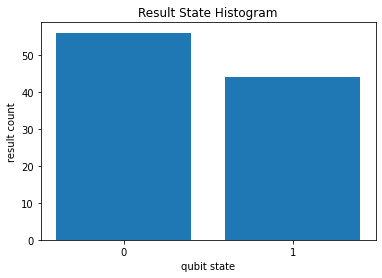

In [6]:
runMainCircuit(1, 1)

Input Length:  2
Number of iterations:  1
Number of x such that f(x) = 1:  1
1 th one is:  11
Iteration no:  0
Circuit used to solve problem: 
0: ───H───@───H───X───@───X───H───M('result')───
          │           │           │
1: ───H───@───H───X───@───X───H───M─────────────
Results: 
result=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111, 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
Sampled results:
Counter({'11': 100})
Expected Success Rate:  100.0 %
Time taken to create circuit:  0.0030508041381835938
Time taken for execution:  0.007454633712768555
Time taken by program:  0.010505437850952148


(0.0030508041381835938, 0.007454633712768555)

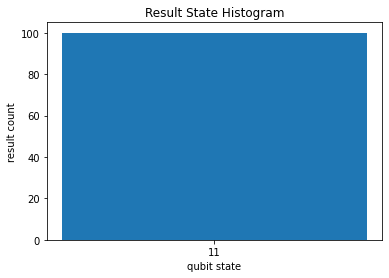

In [7]:
runMainCircuit(2, 1)

Input Length:  2
Number of iterations:  1
Number of x such that f(x) = 1:  2
1 th one is:  10
2 th one is:  11
Iteration no:  0
Circuit used to solve problem: 
0: ───H───────@───────@───H───X───@───X───H───M('result')───
              │       │           │           │
1: ───H───X───@───X───@───H───X───@───X───H───M─────────────
Results: 
result=1100100100101110010000010011101010110010100010000110011001001011000100100010100100010111100001101001, 0111001111110100100001110010000111011100011010101000100100000000100000100100110101011001110110001100
Sampled results:
Counter({'00': 30, '01': 28, '10': 26, '11': 16})
Expected Success Rate:  49.999999999999964 %
Time taken to create circuit:  0.002881765365600586
Time taken for execution:  0.009824752807617188
Time taken by program:  0.012706518173217773


(0.002881765365600586, 0.009824752807617188)

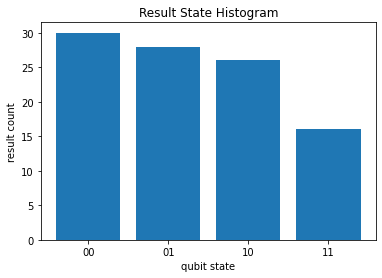

In [8]:
runMainCircuit(2, 2)

Input Length:  2
Number of iterations:  1
Number of x such that f(x) = 1:  3
1 th one is:  10
2 th one is:  00
3 th one is:  01
Iteration no:  0
Circuit used to solve problem: 
0: ───H───────@───X───────@───X───X───@───X───H───X───@───X───H───M('result')───
              │           │           │               │           │
1: ───H───X───@───X───X───@───X───────@───H───X───────@───X───H───M─────────────
Results: 
result=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111, 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
Sampled results:
Counter({'11': 100})
Expected Success Rate:  1.4997597826618575e-30 %
Time taken to create circuit:  0.0034821033477783203
Time taken for execution:  0.009679794311523438
Time taken by program:  0.013161897659301758


(0.0034821033477783203, 0.009679794311523438)

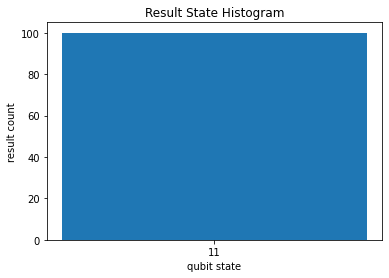

In [9]:
runMainCircuit(2, 3)

Input Length:  3
Number of iterations:  2
Number of x such that f(x) = 1:  1
1 th one is:  001
Iteration no:  0
Iteration no:  1
Circuit used to solve problem: 
0: ───H───X───@───X───H───X───@───X───H───H───H───M('result')───
              │               │                   │
1: ───H───X───@───X───H───X───@───X───H───H───H───M─────────────
              │               │                   │
2: ───H───────@───H───X───────@───X───H───H───H───M─────────────
Results: 
result=0000000000000000100000000100001000000000010001000000000011001000000000000000001000000100100000000000, 0000000001000000000000000100001001000000001001000001001011001000000001000000101000010000100000000000, 1111111011101111011111111011110111111111101111111011111111110101111111111111110111101111111111111111
Sampled results:
Counter({'001': 77, '011': 7, '000': 4, '110': 4, '111': 4, '100': 2, '010': 1, '101': 1})
Expected Success Rate:  94.53124999999999 %
Time taken to create circuit:  0.011505126953125
Time taken for ex

(0.011505126953125, 0.015104293823242188)

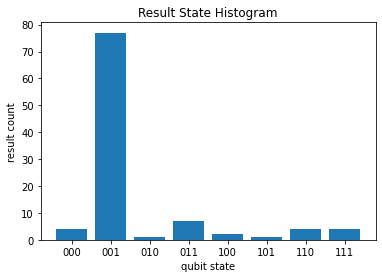

In [10]:
runMainCircuit(3, 1)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  2
1 th one is:  100
2 th one is:  011
Iteration no:  0
Circuit used to solve problem: 
0: ───H───────@───X───@───X───H───X───@───X───H───M('result')───
              │       │               │           │
1: ───H───X───@───X───@───H───X───────@───X───H───M─────────────
              │       │               │           │
2: ───H───X───@───X───@───H───X───────@───X───H───M─────────────
Results: 
result=1001000110100000010000000000000111000000001100001011000000101111100101101000010001110110101011110101, 0110111001011111101111111111111000111111110011110100111111010000011010010111101110001001010100001010, 0110111001011111101111111111111000111111110011110100111111010000011010010111101110001001010100001010
Sampled results:
Counter({'011': 62, '100': 38})
Expected Success Rate:  100.0 %
Time taken to create circuit:  0.003303050994873047
Time taken for execution:  0.022082090377807617
Time taken by program:  0.0253851413

(0.003303050994873047, 0.022082090377807617)

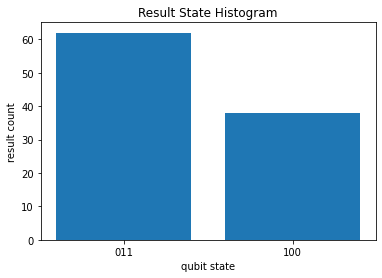

In [11]:
runMainCircuit(3, 2)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  3
1 th one is:  101
2 th one is:  110
3 th one is:  010
Iteration no:  0
Circuit used to solve problem: 
0: ───H───────@───────@───X───────@───X───H───X───@───X───H───M('result')───
              │       │           │               │           │
1: ───H───X───@───X───@───────────@───H───X───────@───X───H───M─────────────
              │       │           │               │           │
2: ───H───────@───X───@───X───X───@───X───H───X───@───X───H───M─────────────
Results: 
result=1111001111111100110001111011010101110001001001010101010101011011100010100101111010110101001100111101, 1101111011011111011111000100101110001111111011011110101010100110011111011011101100001010111111000010, 0110000100100000100000110111010001111000010110100001011101011001100001100100010011110101000000011101
Sampled results:
Counter({'010': 33, '101': 32, '110': 23, '011': 6, '001': 3, '100': 2, '111': 1})
Expected Success Rate:  84.375000000000

(0.002627849578857422, 0.010245323181152344)

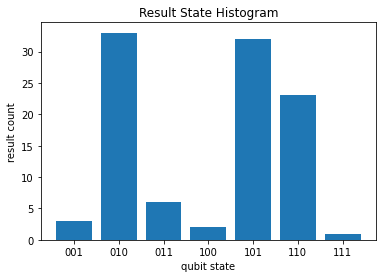

In [12]:
runMainCircuit(3, 3)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  4
1 th one is:  001
2 th one is:  111
3 th one is:  011
4 th one is:  100
Iteration no:  0
Circuit used to solve problem: 
0: ───H───X───@───X───@───X───@───X───@───H───X───────@───X───H───M('result')───
              │       │       │       │               │           │
1: ───H───X───@───X───@───────@───X───@───X───H───X───@───X───H───M─────────────
              │       │       │       │               │           │
2: ───H───────@───────@───────@───X───@───X───H───X───@───X───H───M─────────────
Results: 
result=0010001100111001111101001000100011111001001000100111010110111101011010100100011100011100100111000101, 1110111001101110101111001011001000111110001111000000110001100010001001001100011111111001101101000101, 0101110010101010100011011111010100100111011110101100110100010010110000111000010001101111101010001100
Sampled results:
Counter({'011': 18, '110': 15, '100': 14, '001': 12, '111': 12, '000': 12, '101': 9,

(0.002420186996459961, 0.009086132049560547)

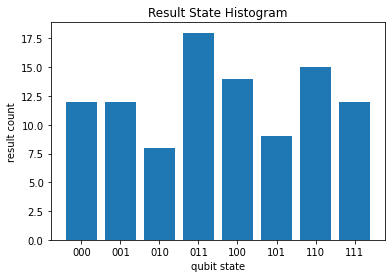

In [13]:
runMainCircuit(3, 4)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  5
1 th one is:  111
2 th one is:  010
3 th one is:  100
4 th one is:  011
5 th one is:  110
Iteration no:  0
Circuit used to solve problem: 
0: ───H───@───X───@───X───────@───X───@───X───@───H───X───────@───X───H───M('result')───
          │       │           │       │       │               │           │
1: ───H───@───────@───X───────@───X───@───────@───H───X───────@───X───H───M─────────────
          │       │           │       │       │               │           │
2: ───H───@───X───@───X───X───@───X───@───X───@───X───H───X───@───X───H───M─────────────
Results: 
result=0010101101000110001000100110010011000001111101000010000110100110101011111101000110101000010110101000, 0000100100000000001000011011000000000000100010000001000000001001101001001000000010000000010000000000, 1010001011010110000111110111100011100101111111011101000111111010100011111101000101101001011110010011
Sampled results:
Counter({'000': 29, '101':

(0.018062114715576172, 0.037149906158447266)

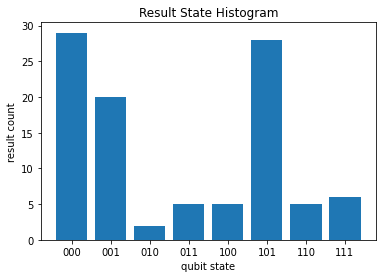

In [14]:
runMainCircuit(3, 5)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  6
1 th one is:  001
2 th one is:  101
3 th one is:  100
4 th one is:  000
5 th one is:  110
6 th one is:  111
Iteration no:  0
Circuit used to solve problem: 
0: ───H───X───@───X───────@───────────@───X───────@───X───────@───────@───H───X───@───X───H───M('result')───
              │           │           │           │           │       │           │           │
1: ───H───X───@───X───X───@───X───X───@───X───X───@───X───────@───────@───H───X───@───X───H───M─────────────
              │           │           │           │           │       │           │           │
2: ───H───────@───────────@───X───────@───X───X───@───X───X───@───X───@───H───X───@───X───H───M─────────────
Results: 
result=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111, 11111001101000110000010011

(0.01138448715209961, 0.018309831619262695)

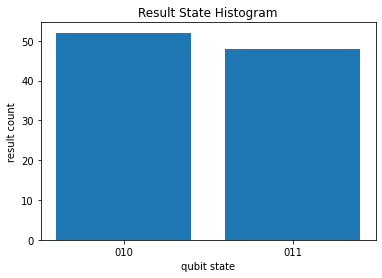

In [15]:
runMainCircuit(3, 6)

Input Length:  3
Number of iterations:  1
Number of x such that f(x) = 1:  7
1 th one is:  001
2 th one is:  011
3 th one is:  100
4 th one is:  110
5 th one is:  111
6 th one is:  101
7 th one is:  010
Iteration no:  0
Circuit used to solve problem: 
0: ───H───X───@───X───X───@───X───@───────────@───────@───────@───X───@───X───H───X───@───X───H───M('result')───
              │           │       │           │       │       │       │               │           │
1: ───H───X───@───X───────@───X───@───X───────@───────@───X───@───X───@───H───X───────@───X───H───M─────────────
              │           │       │           │       │       │       │               │           │
2: ───H───────@───────────@───X───@───X───X───@───X───@───────@───X───@───X───H───X───@───X───H───M─────────────
Results: 
result=0000000000000010100000000000010000000000000000000100010000010000010000000000000000000100000000001000, 010010000000001001000100010000000000000001010000000001000000000001000000000000000000001000

(0.013812065124511719, 0.02122783660888672)

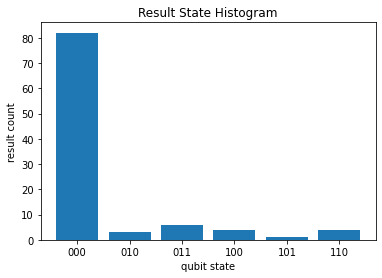

In [16]:
runMainCircuit(3, 7)

Input Length:  4
Number of iterations:  3
Number of x such that f(x) = 1:  1
1 th one is:  1011
Iteration no:  0
Iteration no:  1
Iteration no:  2
Circuit used to solve problem: 
0: ───H───────@───H───X───────@───X───H───H───H───H───H───M('result')───
              │               │                           │
1: ───H───X───@───X───H───X───@───X───H───H───H───H───H───M─────────────
              │               │                           │
2: ───H───────@───H───X───────@───X───H───H───H───H───H───M─────────────
              │               │                           │
3: ───H───────Z───H───X───────Z───X───H───H───H───H───H───M─────────────
Results: 
result=1100111000110111101010111001111111111111110111110110111111010011111101111111011111110010110010111011, 1000000101001010010101001010100000001000100001000000000000101010000010111000001000001001101011000101, 1011111100110101101000111100110111101111110110111111111111111101111101001101100111010111010110100011, 00101111101111111010111110

(0.019286394119262695, 0.04626584053039551)

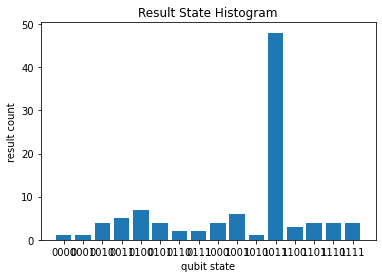

In [17]:
runMainCircuit(4, 1)

Input Length:  5
Number of iterations:  4
Number of x such that f(x) = 1:  1
1 th one is:  01110
Iteration no:  0
Iteration no:  1
Iteration no:  2
Iteration no:  3
Circuit used to solve problem: 
0: ───H───X───@───X───H───X───@───X───H───H───H───H───H───H───H───M('result')───
              │               │                                   │
1: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───M─────────────
              │               │                                   │
2: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───M─────────────
              │               │                                   │
3: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───M─────────────
              │               │                                   │
4: ───H───X───Z───X───H───X───Z───X───H───H───H───H───H───H───H───M─────────────
Results: 
result=0000000010001100010100001011000100000100000110001111110000000100011000011000100101001101001001100011, 0111010

(0.023461341857910156, 0.03740239143371582)

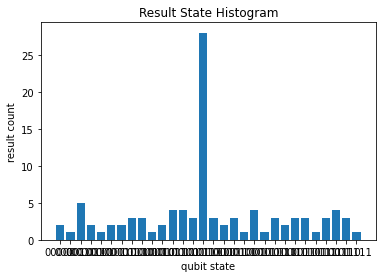

In [18]:
runMainCircuit(5, 1)

Input Length:  6
Number of iterations:  6
Number of x such that f(x) = 1:  1
1 th one is:  101110
Iteration no:  0
Iteration no:  1
Iteration no:  2
Iteration no:  3
Iteration no:  4
Iteration no:  5
Circuit used to solve problem: 
0: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───M('result')───
              │               │                                                   │
1: ───H───X───@───X───H───X───@───X───H───H───H───H───H───H───H───H───H───H───H───M─────────────
              │               │                                                   │
2: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───M─────────────
              │               │                                                   │
3: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───M─────────────
              │               │                                                   │
4: ───H───────@───H───X───────@───X───H───H─

(0.014573097229003906, 0.035951852798461914)

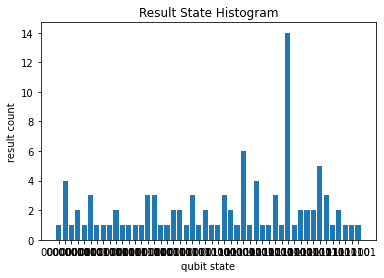

In [19]:
runMainCircuit(6, 1)

Input Length:  7
Number of iterations:  8
Number of x such that f(x) = 1:  1
1 th one is:  1011100
Iteration no:  0
Iteration no:  1
Iteration no:  2
Iteration no:  3
Iteration no:  4
Iteration no:  5
Iteration no:  6
Iteration no:  7
Circuit used to solve problem: 
0: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───H───H───H───H───M('result')───
              │               │                                                                   │
1: ───H───X───@───X───H───X───@───X───H───H───H───H───H───H───H───H───H───H───H───H───H───H───H───M─────────────
              │               │                                                                   │
2: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───H───H───H───H───M─────────────
              │               │                                                                   │
3: ───H───────@───H───X───────@───X───H───H───H───H───H───H───H───H───H───H───H───H───H───H───

(0.03809094429016113, 0.05933713912963867)

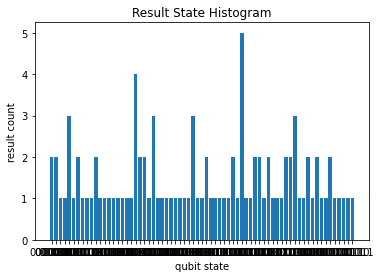

In [20]:
runMainCircuit(7, 1)

Time for various Zf for n = 5 and a = 1

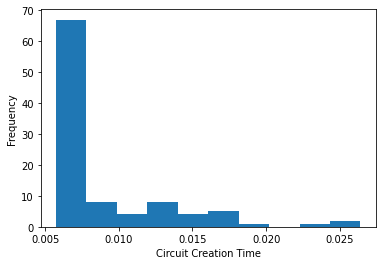

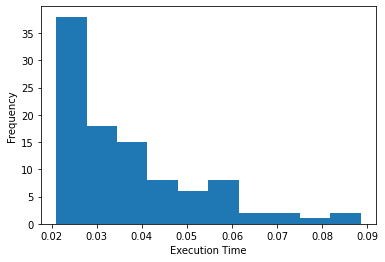

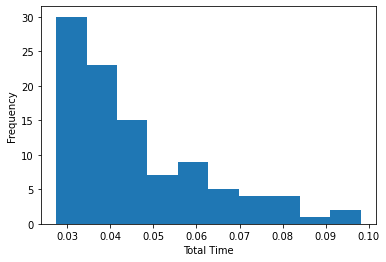

In [21]:
circuitTimes = []
executionTimes = []
totalTimes = []
for i in range(100):
    (circuit, execution) = runMainCircuit(5, 1, False)
    circuitTimes.append(circuit)
    executionTimes.append(execution)
    totalTimes.append(circuit + execution)
plt.hist(circuitTimes)
plt.xlabel('Circuit Creation Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(executionTimes)
plt.xlabel('Execution Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(totalTimes)
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.show() 

Effect of a on execution time

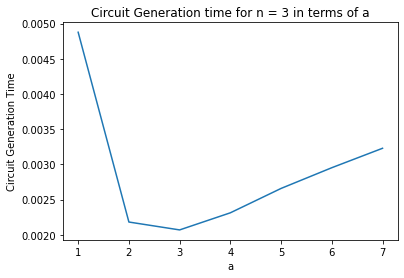

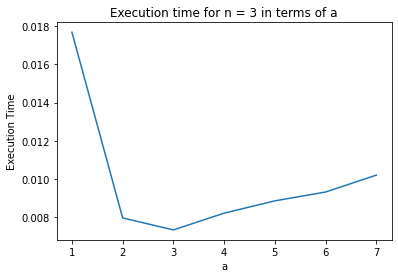

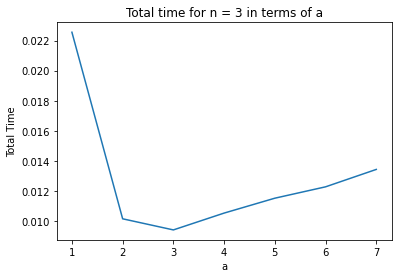

In [22]:
circuitTimes = []
executionTimes = []
totalTimes = []
for a in range(1, 8):
    ct = 0
    et = 0
    tt = 0
    for i in range(100):
        (circuit, execution) = runMainCircuit(3, a, False)
        ct += circuit
        et += execution
        tt += circuit + execution
    circuitTimes.append(ct / 100)
    executionTimes.append(et / 100)
    totalTimes.append(tt / 100)

x_axis = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time for n = 3 in terms of a')
plt.ylabel('Circuit Generation Time')
plt.xlabel('a')
plt.show() 

plt.plot(x_axis, executionTimes)
plt.title('Execution time for n = 3 in terms of a')
plt.ylabel('Execution Time')
plt.xlabel('a')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time for n = 3 in terms of a')
plt.ylabel('Total Time')
plt.xlabel('a')
plt.show() 

Effect of n on execution time

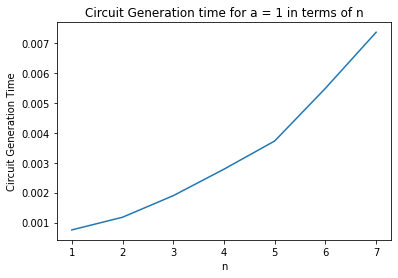

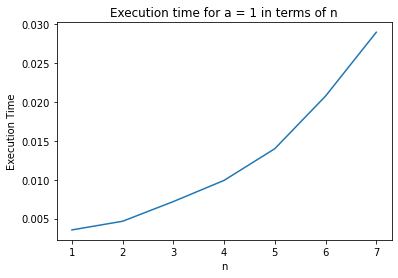

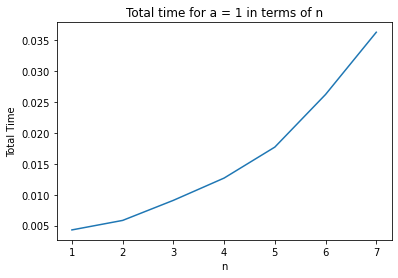

In [23]:
circuitTimes = []
executionTimes = []
totalTimes = []
for n in range(1, 8):
    ct = 0
    et = 0
    tt = 0
    for i in range(100):
        (circuit, execution) = runMainCircuit(n, 1, False)
        ct += circuit
        et += execution
        tt += circuit + execution
    circuitTimes.append(ct / 100)
    executionTimes.append(et / 100)
    totalTimes.append(tt / 100)

x_axis = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time for a = 1 in terms of n')
plt.ylabel('Circuit Generation Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, executionTimes)
plt.title('Execution time for a = 1 in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time for a = 1 in terms of n')
plt.ylabel('Total Time')
plt.xlabel('n')
plt.show() 

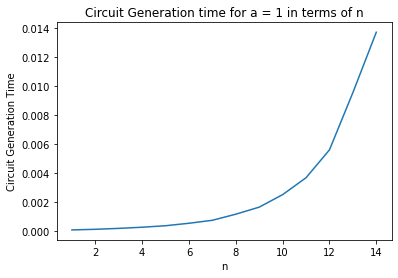

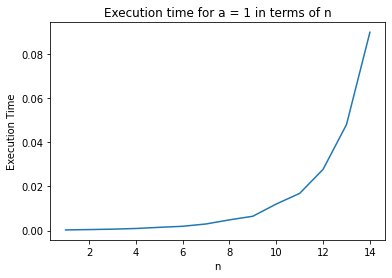

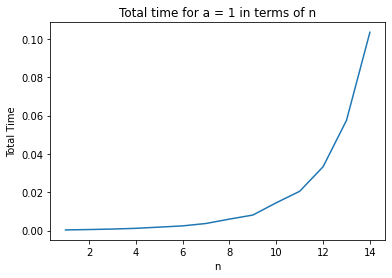

In [24]:
circuitTimes = []
executionTimes = []
totalTimes = []
for n in range(1, 15):
    ct = 0
    et = 0
    tt = 0
    for i in range(10):
        (circuit, execution) = runMainCircuit(n, 1, False)
        ct += circuit
        et += execution
        tt += circuit + execution
    circuitTimes.append(ct / 100)
    executionTimes.append(et / 100)
    totalTimes.append(tt / 100)

x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time for a = 1 in terms of n')
plt.ylabel('Circuit Generation Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, executionTimes)
plt.title('Execution time for a = 1 in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time for a = 1 in terms of n')
plt.ylabel('Total Time')
plt.xlabel('n')
plt.show() 